In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet, Lasso, Ridge


In [63]:
boston = load_boston()
print(boston.keys())
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highway

C:\Users\karim tamer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

In [64]:
print(boston.keys())
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highway

In [65]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bias=1
bos.insert(0,'Bias',bias) #ADDING BIAS COLUMN = 1
bos['MEDV'] = boston.target
bos.head()

,Bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,1,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [66]:
bos.describe()

,Bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.0,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.0,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,0.0,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.0,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,1.0,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,1.0,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,1.0,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,1.0,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [67]:
print("[INFO] df isnull():\n {}".format(bos.isnull().sum()))


[INFO] df isnull():
 Bias       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [68]:
Train = pd.DataFrame(bos,columns=['Bias','CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
Test = bos['MEDV']

print(Train.shape)
print(Test.shape)

(506, 14)
(506,)


In [69]:
#TRAIN/TEST/CV SETS
X_train, X_test, Y_train, Y_test = train_test_split(Train, Test,
    test_size=0.2, shuffle = True, random_state = 8)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(Y_train.shape))
print("y_test shape: {}".format(Y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(Y_val.shape))

X_train shape: (303, 14)
X_test shape: (102, 14)
y_train shape: (303,)
y_test shape: (102,)
X_val shape: (101, 14)
y val shape: (101,)


In [70]:
########################################DEGREE OF 1###########################################
lm = LinearRegression()
lm.fit(X_train, Y_train)

print('Linear Regression coefficients: {}'.format(lm.coef_))
print('Linear Regression intercept: {}'.format(lm.intercept_))

y_train_predict = lm.predict(X_train)
b, m = np.polynomial.polynomial.polyfit(Y_train, y_train_predict, 1)


Linear Regression coefficients: [ 0.00000000e+00 -1.01524906e-01  4.22304770e-02  4.45883322e-03
  3.00017044e+00 -1.11349496e+01  4.63929486e+00  2.55358926e-03
 -1.18085053e+00  3.15787330e-01 -1.27307395e-02 -9.72346550e-01
  8.78398693e-03 -5.93836980e-01]
Linear Regression intercept: 27.83027492583024


C:\Users\karim tamer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\karim tamer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


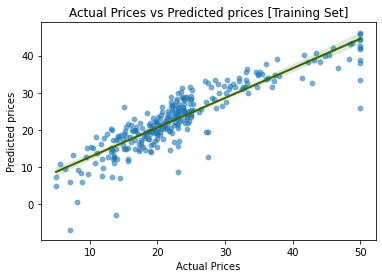

In [71]:
sns.scatterplot(Y_train, y_train_predict, alpha=0.4)
sns.regplot(Y_train, y_train_predict, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2})
sns.lineplot(np.unique(Y_train), np.unique(np.poly1d(b + m * np.unique(Y_train))), linewidth=0.5, color='r')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices [Training Set]")
 
plt.show()

In [72]:
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print("The linear model performance for training set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The linear model performance for training set
RMSE is 4.36453051790404
R2 score is 0.7962044716304372


In [73]:
y_test_predict = lm.predict(X_test)

C:\Users\karim tamer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\karim tamer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


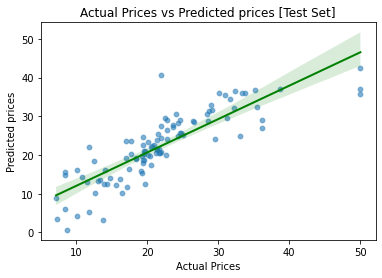

In [74]:
sns.scatterplot(Y_test, y_test_predict, alpha=0.4)
sns.regplot(Y_test, y_test_predict, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2})
 
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices [Test Set]")
 
plt.show()

In [75]:
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
 
# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("\nThe linear model performance for testing set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The linear model performance for testing set
RMSE is 4.8007696582095924
R2 score is 0.6889443477199917


In [76]:
######################################## DEGREE OF 2 ###########################################
poly_features = PolynomialFeatures(degree=2)
   
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
poly_model = LinearRegression()

poly_model.fit(X_train_poly, Y_train)
print('Linear Regression coefficients: {}'.format(poly_model.coef_))
print('Linear Regression intercept: {}'.format(poly_model.intercept_))   
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
   
# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))

Linear Regression coefficients: [-9.77778633e+07  9.48589096e-09 -3.47300314e+00  2.33448755e-01
 -2.29048179e+00  2.69772531e+01  1.67391686e+02  1.38647955e+01
  4.07384487e-01  1.98082653e-01  1.08732619e+00  4.62224425e-03
  4.94168671e+00  4.10286379e-02  6.70084184e-01 -2.00513365e-09
 -3.47300313e+00  2.33448755e-01 -2.29048178e+00  2.69772531e+01
  1.67391686e+02  1.38647955e+01  4.07384487e-01  1.98082656e-01
  1.08732619e+00  4.62224578e-03  4.94168671e+00  4.10286369e-02
  6.70084186e-01  2.55715662e-03  2.18591788e-01  8.43958784e-01
  5.21911190e+00 -2.33988520e+00  7.09666815e-02  5.16916031e-03
  1.31681993e-01  6.88056876e-01 -6.30278916e-02  8.35632739e-01
  1.39413575e-04  1.63243430e-02 -7.67530817e-04 -6.73250536e-03
 -4.19161861e-02 -6.97396878e-01  3.17865727e-02  2.75830521e-04
 -8.39835144e-03 -1.38810730e-02  5.14008629e-04 -2.31975620e-03
 -7.10098233e-04 -5.38591876e-03  3.22542120e-02  2.89113255e-01
  1.68103290e+00  4.49139575e-01 -3.34285808e-04  1.243069

C:\Users\karim tamer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\karim tamer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


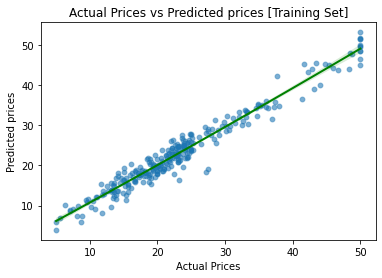

In [77]:
sns.scatterplot(Y_train, y_train_predicted, alpha=0.4)
sns.regplot(Y_train, y_train_predicted, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices [Training Set]")
 
plt.show()

C:\Users\karim tamer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


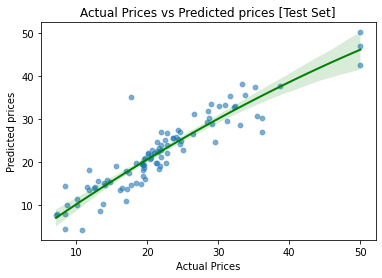

In [78]:
sns.scatterplot(Y_test, y_test_predicted, alpha=0.4)
sns.regplot(Y_test, y_test_predicted, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices [Test Set]")
 
plt.show()

In [79]:
# evaluating the model on training data-set
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
r2_train = r2_score(Y_train, y_train_predicted)
     
print("The polynomial model performance for the training set")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

The polynomial model performance for the training set
RMSE of training set is 2.0179348284171787
R2 score of training set is 0.9564353876743457


In [80]:
# evaluating the model on test data-set
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predicted))
r2_test = r2_score(Y_test, y_test_predicted)

print("The polynomial model performance for the test set")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The polynomial model performance for the test set
RMSE of test set is 3.3618000780778106
R2 score of test set is 0.8474682947904434


In [81]:
######################################## DEGREE OF 8 ###########################################
poly_features2 = PolynomialFeatures(degree=8)
   
# transform the features to higher degree features.
X_train_poly = poly_features2.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
poly_model2 = LinearRegression()

poly_model2.fit(X_train_poly, Y_train)
print('Linear Regression coefficients: {}'.format(poly_model2.coef_))
print('Linear Regression intercept: {}'.format(poly_model2.intercept_))     
# predicting on training data-set
y_train_predicted = poly_model2.predict(X_train_poly)
   
# predicting on test data-set
y_test_predicted = poly_model2.predict(poly_features2.fit_transform(X_test))

Linear Regression coefficients: [ 2.55158801e-23 -5.24228741e-25  7.21327444e-25 ... -1.45217046e-18
 -8.51068689e-20 -9.73452215e-22]
Linear Regression intercept: 16.85991854530918


C:\Users\karim tamer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\karim tamer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


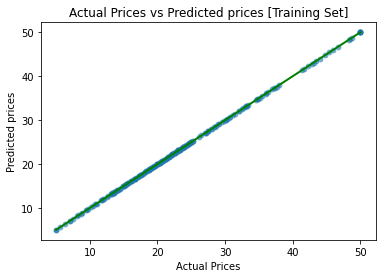

In [82]:
sns.scatterplot(Y_train, y_train_predicted, alpha=0.4)
sns.regplot(Y_train, y_train_predicted, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices [Training Set]")
 
plt.show()

C:\Users\karim tamer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


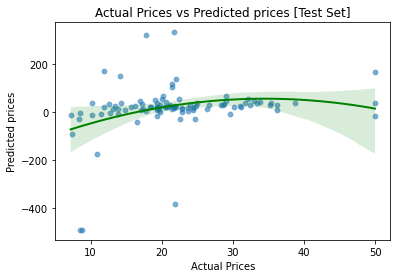

In [83]:
sns.scatterplot(Y_test, y_test_predicted, alpha=0.4)
sns.regplot(Y_test, y_test_predicted, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices [Test Set]")
 
plt.show()

In [84]:
# evaluating the model on training data-set
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
r2_train = r2_score(Y_train, y_train_predicted)
     
print("The polynomial model performance for the training set")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

The polynomial model performance for the training set
RMSE of training set is 8.502261378830095e-11
R2 score of training set is 1.0


In [85]:
# evaluating the model on test data-set
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predicted))
r2_test = r2_score(Y_test, y_test_predicted)

print("The polynomial model performance for the test set")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The polynomial model performance for the test set
RMSE of test set is 99.83702641204587
R2 score of test set is -133.5239572064578


In [98]:
############################## REGULARIZATION ###############################################
def plot_errors(lambdas, train_errors, CV_errors, title):
    plt.figure(figsize=(16, 9))
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, CV_errors, label="CV")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

def evaluate_model(Model, lambdas):
    training_errors = [] # we will store the error on the training set, for using each different lambda
    CV_errors = [] # and the error on the CV set
    for l in lambdas:
        model = Model(alpha=l, max_iter=1000) # we allow max number of iterations until the model converges
        model.fit(X_train, y_train)

        training_predictions = model.predict(X_train)
        training_mse = mean_squared_error(y_train, training_predictions)
        training_errors.append(training_mse)

        CV_predictions = model.predict(X_val)
        CV_mse = mean_squared_error(y_val, CV_predictions)
        CV_errors.append(CV_mse)
    return training_errors, CV_errors

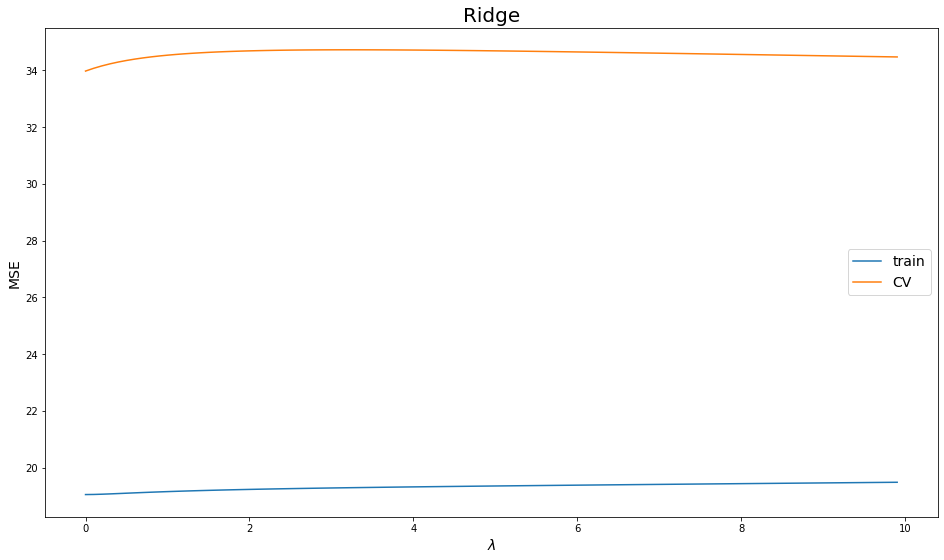

In [100]:
lambdas = np.arange(0,10, step=0.1)
ridge_train, ridge_test = evaluate_model(Ridge, lambdas)
plot_errors(lambdas, ridge_train, ridge_test, "Ridge")